## Problem Statement
  - As a defence analyst, find hotspots of terrorism
  - What all security issues/insights can be derived from Exploratory Data Analysis (EDA) and Hypothesis Testing?   

### Questions

- **Who/Whom?** 
    - Perpetrator Information 
    - Target/Victim Information 
    
- **What?**
    - Incident Information Analysis 
  
- **Where?**
    - Incident Location Analysis 
    
- **When?** 
    - GTD Data AND associated information 

- **How?**
    - Attack Information 
    - Weapon Information 
    
- **Resultant Information** 
    - Casualties AND Consequences 


**Observation** - Splitting the dataset into these 5 categories enabled a more in-depth analysis  

## Data Collection Methodology 
- Data was collected in real-time between 1970-1997, was retrospective between 1998-2007 AND was again collected in real-time afterwards
- Data Collection and definition of terrorism - different organizations have parsed the database at different instances - AND later on incorporated changes which may assist individual users in determining if the attack was indeed a terrorist attack. So do check out for such differences
- Report how the inconsistencies have been addressed in your analysis 

In [173]:
import warnings
warnings.filterwarnings("ignore")
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set_context("paper")
sns.set_style("darkgrid")

import plotly
import plotly.express as px
import plotly.io as pio
from IPython.display import display
from geopy.geocoders import Nominatim 

## Installations 

## Import Data 

In [174]:
df = pd.read_csv("data/terrorism.csv", encoding="latin-1")
df = df.drop_duplicates()
df = df[df["region_txt"].isin(["South Asia"])]
df["eventid"] = df["eventid"].astype("int64")

## Auxiliary Functions 

In [175]:
def prelim_inspection(df):
  """
  Preliminary Overview to get a basic understanding of the underlying data 
  """
  display(df.head()) # Dataset overview
  print("Dataset Overview\n")
  display(df.shape)  # Dataset shape
  print("Dataset Shape\n")
  display(df.iloc[:5, :].dtypes)  # First five rows for minimal output
  print("Column datatypes\n")
  display(df.isna().any())
  print("Check for null values\n")
  display(df.nunique())
  print("Count of unique values\n")
  display(df.describe(percentiles=[0.25,0.5,0.75,0.85,0.95,0.99]))
  print("Dataset descriptive information \n")
  display((df.isna().sum()/len(df) * 100).sort_values(ascending=False))
  print("Percentage of null values\n")

In [172]:
prelim_inspection(df)

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,...,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000000,1970,11,1,NaN,0,NaN,153,Pakistan,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
1,197000000000,1972,2,22,NaN,0,NaN,92,India,6,...,NaN,NaN,NaN,NaN,Hijacking DB,1,1,1,1,NaN
2,197000000000,1973,5,1,NaN,0,NaN,4,Afghanistan,6,...,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
3,197000000000,1974,2,2,NaN,1,02-03-1974,153,Pakistan,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
4,197000000000,1974,12,9,NaN,0,NaN,153,Pakistan,6,...,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN


Dataset Overview



(44152, 135)

Dataset Shape



eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
               ...  
INT_LOG        int64
INT_IDEO       int64
INT_MISC       int64
INT_ANY        int64
related       object
Length: 135, dtype: object

Column datatypes



eventid       False
iyear         False
imonth        False
iday          False
approxdate     True
              ...  
INT_LOG       False
INT_IDEO      False
INT_MISC      False
INT_ANY       False
related        True
Length: 135, dtype: bool

Check for null values



eventid          6
iyear           46
imonth          13
iday            32
approxdate    1016
              ... 
INT_LOG          3
INT_IDEO         3
INT_MISC         3
INT_ANY          3
related       2969
Length: 135, dtype: int64

Count of unique values



,eventid,iyear,imonth,iday,extended,country,region,latitude,longitude,specificity,...,ransomamt,ransomamtus,ransompaid,ransompaidus,hostkidoutcome,nreleased,INT_LOG,INT_IDEO,INT_MISC,INT_ANY
count,4.415200e+04,44152.000000,44152.000000,44152.000000,44152.000000,44152.000000,44152.0,43673.000000,43673.000000,44148.000000,...,2.170000e+02,1.630000e+02,1.720000e+02,159.000000,3479.000000,3345.000000,44152.000000,44152.000000,44152.000000,44152.000000
mean,2.009320e+11,2008.755005,6.444283,15.583326,0.056373,91.320167,6.0,28.456280,74.271976,1.608974,...,2.078918e+06,9.882802e+03,2.447216e+04,61.647799,4.795056,-27.199402,-4.933434,-4.885645,0.044913,-4.560903
std,9.177522e+08,8.670915,3.389015,8.828559,0.230644,65.065620,0.0,7.343117,8.600140,0.993315,...,1.422918e+07,1.176986e+05,1.929024e+05,793.228184,1.858638,56.007278,4.496767,4.558369,0.486364,4.610228
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000,4.000000,6.0,-20.420074,57.464140,1.000000,...,-9.900000e+01,-9.900000e+01,-9.900000e+01,-99.000000,1.000000,-99.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,2.010000e+11,2007.000000,4.000000,8.000000,0.000000,4.000000,6.0,24.891115,67.687177,1.000000,...,-9.900000e+01,0.000000e+00,-9.900000e+01,0.000000,4.000000,-99.000000,-9.000000,-9.000000,0.000000,-9.000000
50%,2.010000e+11,2012.000000,6.000000,15.000000,0.000000,92.000000,6.0,31.467463,71.383188,1.000000,...,1.566847e+04,0.000000e+00,0.000000e+00,0.000000,4.000000,0.000000,-9.000000,-9.000000,0.000000,-9.000000
75%,2.020000e+11,2015.000000,9.000000,23.000000,0.000000,153.000000,6.0,34.002579,80.623416,2.000000,...,1.661820e+05,0.000000e+00,0.000000e+00,0.000000,7.000000,1.000000,0.000000,0.000000,0.000000,0.000000
85%,2.020000e+11,2016.000000,11.000000,26.000000,0.000000,153.000000,6.0,34.386435,85.125982,3.000000,...,4.309000e+05,0.000000e+00,0.000000e+00,0.000000,7.000000,3.000000,0.000000,0.000000,0.000000,0.000000
95%,2.020000e+11,2017.000000,12.000000,29.000000,1.000000,186.000000,6.0,35.671067,91.815692,4.000000,...,6.695376e+06,0.000000e+00,5.571087e+04,0.000000,7.000000,8.000000,0.000000,1.000000,1.000000,1.000000
99%,2.020000e+11,2017.000000,12.000000,31.000000,1.000000,186.000000,6.0,36.868631,94.074439,5.000000,...,2.920000e+07,4.420000e+04,4.251037e+05,0.000000,7.000000,50.000000,1.000000,1.000000,1.000000,1.000000


Dataset descriptive information 



gsubname3           99.990940
weaptype4           99.975086
weaptype4_txt       99.975086
weapsubtype4        99.972821
weapsubtype4_txt    99.972821
                      ...    
doubtterr            0.000000
crit3                0.000000
crit2                0.000000
crit1                0.000000
eventid              0.000000
Length: 135, dtype: float64

Percentage of null values



## Perpetrator-Target Information 

In [288]:
def append_values(row): # Change the name of this function 
    final_val=[]
    final_val.append(row["corp1"])
    
    if row["corp2"]!="Unknown" and row["corp2"]!= row["corp1"] and row["corp2"] != row["corp3"]: 
        final_val.append(row["corp2"])
        
    if row["corp3"]!="Unknown" and row["corp3"]!= row["corp1"] and row["corp3"]!=row["corp2"]: 
        final_val.append(row["corp3"])
        
    final_string = ",".join(final_val)
    
    return final_string

#### Perpetrator Data 

In [349]:
## Load the datasets 
df_perp = df[["gname", "gsubname", "gname2", "gname3", "gsubname3", "guncertain1", "guncertain2", "guncertain3", 
                       "individual", "nperps", "nperpcap", "claimed", "claimmode", "claimmode_txt", "compclaim", "claim2", "claimmode2", 
                       "claim3", "claimmode3", "motive"]]
df_target = df[["targtype1", "targtype1_txt", "targsubtype1", "targsubtype1_txt", "corp1", "target1", "natlty1", 
                "natlty1_txt", "corp2", "target2", "natlty2", "natlty2_txt", "targtype2", "targtype2_txt", "corp3", 
                "target3", "natlty3", "natlty3_txt", "targtype3", "targtype3_txt"]]

In [301]:
prelim_inspection(df_perp)

,gname,gsubname,gname2,gname3,gsubname3,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,compclaim,claim2,claimmode2,claim3,claimmode3,motive
0,Unknown,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Palestinians,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,5.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Black December,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Muslim Guerrillas,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,3.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Unknown,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset Overview



(44152, 20)

Dataset Shape



gname             object
gsubname          object
gname2            object
gname3            object
gsubname3         object
guncertain1      float64
guncertain2      float64
guncertain3      float64
individual         int64
nperps           float64
nperpcap         float64
claimed          float64
claimmode        float64
claimmode_txt     object
compclaim        float64
claim2           float64
claimmode2       float64
claim3           float64
claimmode3       float64
motive            object
dtype: object

Column datatypes



gname            False
gsubname          True
gname2            True
gname3            True
gsubname3         True
guncertain1       True
guncertain2       True
guncertain3       True
individual       False
nperps            True
nperpcap          True
claimed           True
claimmode         True
claimmode_txt     True
compclaim         True
claim2            True
claimmode2        True
claim3            True
claimmode3        True
motive            True
dtype: bool

Check for null values



gname             591
gsubname          294
gname2            130
gname3             39
gsubname3           4
guncertain1         2
guncertain2         2
guncertain3         2
individual          2
nperps             75
nperpcap           36
claimed             3
claimmode          10
claimmode_txt      10
compclaim           3
claim2              3
claimmode2          9
claim3              2
claimmode3          4
motive           5304
dtype: int64

Count of unique values



,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,compclaim,claim2,claimmode2,claim3,claimmode3
count,44147.000000,628.000000,103.000000,44152.000000,34502.000000,36466.000000,37283.000000,7653.000000,1549.000000,642.000000,242.000000,102.000000,42.000000
mean,0.111151,0.324841,0.339806,0.000091,-71.714683,-0.603713,0.100314,6.842807,-5.311814,0.250779,6.793388,0.411765,6.476190
std,0.314323,0.468689,0.475959,0.009518,183.210589,8.946161,1.063345,2.802431,4.587394,1.204920,3.059350,0.494583,3.299949
min,0.000000,0.000000,0.000000,0.000000,-99.000000,-99.000000,-9.000000,1.000000,-9.000000,-9.000000,1.000000,0.000000,2.000000
25%,0.000000,0.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,5.000000,-9.000000,0.000000,4.000000,0.000000,2.000000
50%,0.000000,0.000000,0.000000,0.000000,-99.000000,0.000000,0.000000,8.000000,-9.000000,0.000000,8.000000,0.000000,8.000000
75%,0.000000,1.000000,1.000000,0.000000,-99.000000,0.000000,0.000000,10.000000,0.000000,1.000000,10.000000,1.000000,10.000000
85%,0.000000,1.000000,1.000000,0.000000,2.000000,0.000000,1.000000,10.000000,0.000000,1.000000,10.000000,1.000000,10.000000
95%,1.000000,1.000000,1.000000,0.000000,8.000000,0.000000,1.000000,10.000000,1.000000,1.000000,10.000000,1.000000,10.000000
99%,1.000000,1.000000,1.000000,0.000000,80.000000,3.000000,1.000000,10.000000,1.000000,1.000000,10.000000,1.000000,10.000000


Dataset descriptive information 



gsubname3        99.990940
claimmode3       99.904874
claim3           99.768980
guncertain3      99.766715
gname3           99.762185
claimmode2       99.451893
guncertain2      98.577641
claim2           98.545932
gname2           98.525548
gsubname         96.586791
compclaim        96.491665
claimmode        82.666697
claimmode_txt    82.666697
motive           61.974542
nperps           21.856315
nperpcap         17.408045
claimed          15.557619
guncertain1       0.011325
individual        0.000000
gname             0.000000
dtype: float64

Percentage of null values



In [302]:
df_perp = df_perp[["gname", "nperpcap", "nperps", "individual", "guncertain1"]]

In [303]:
df_perp.dtypes

gname           object
nperpcap       float64
nperps         float64
individual       int64
guncertain1    float64
dtype: object

In [304]:
# Impute null values AND datatypes of ["guncertain1", "nperpcap" AND "nperp"]
df_perp["nperps"] =  df_perp["nperps"].fillna(-99)
df_perp["nperpcap"] = df_perp["nperpcap"].fillna(-99)

In [305]:
# Only 4 records in the entire dataframe, so drop it 
df_perp.drop(["individual", "guncertain1"], axis=1, inplace=True)

In [306]:
df_perp["nperps"]

0         1.0
1         5.0
2         1.0
3         3.0
4       -99.0
         ... 
44147   -99.0
44148   -99.0
44149   -99.0
44150   -99.0
44151   -99.0
Name: nperps, Length: 44152, dtype: float64

**Observations and Analysis**
- Almost all attacks in the South  Asian region have been carried out by affiliated individuals, barring a few lone-wolves who conducted terrorist attacks in an individual capacity. However, as instructed, such individuals could be operating as sleeper cells, who are not aware of their leader, who in turn could be associated with an organization
- Since a vast majority of perpetrator group names are unknown, it is plausible that a majority of attacks were carried out by localized groups and insurgents, and they mostly operate within one nation state - Check it out later 
- Dubious reporting of terrorist attacks? - Analyze only unsuspected attacks 

In [307]:
top_perp_info = df_perp["gname"].value_counts().sort_values(ascending=False).head(10).to_dict()
df_perp_info = pd.DataFrame(data=top_perp_info.values(), index=top_perp_info.keys(), columns=["Attack_count"])
df_perp_info.head()

,Attack_count
Unknown,21415
Taliban,7325
Communist Party of India - Maoist (CPI-Maoist),1863
Maoists,1605
Liberation Tigers of Tamil Eelam (LTTE),1599


In [308]:
values = df_perp_info["Attack_count"]
labels = df_perp_info.index
print(values.tolist())
print(labels.tolist())

[21415, 7325, 1863, 1605, 1599, 1349, 711, 433, 357, 337]
['Unknown', 'Taliban', 'Communist Party of India - Maoist (CPI-Maoist)', 'Maoists', 'Liberation Tigers of Tamil Eelam (LTTE)', 'Tehrik-i-Taliban Pakistan (TTP)', 'Sikh Extremists', "People's Liberation Front (JVP)", 'United Liberation Front of Assam (ULFA)', 'Khorasan Chapter of the Islamic State']


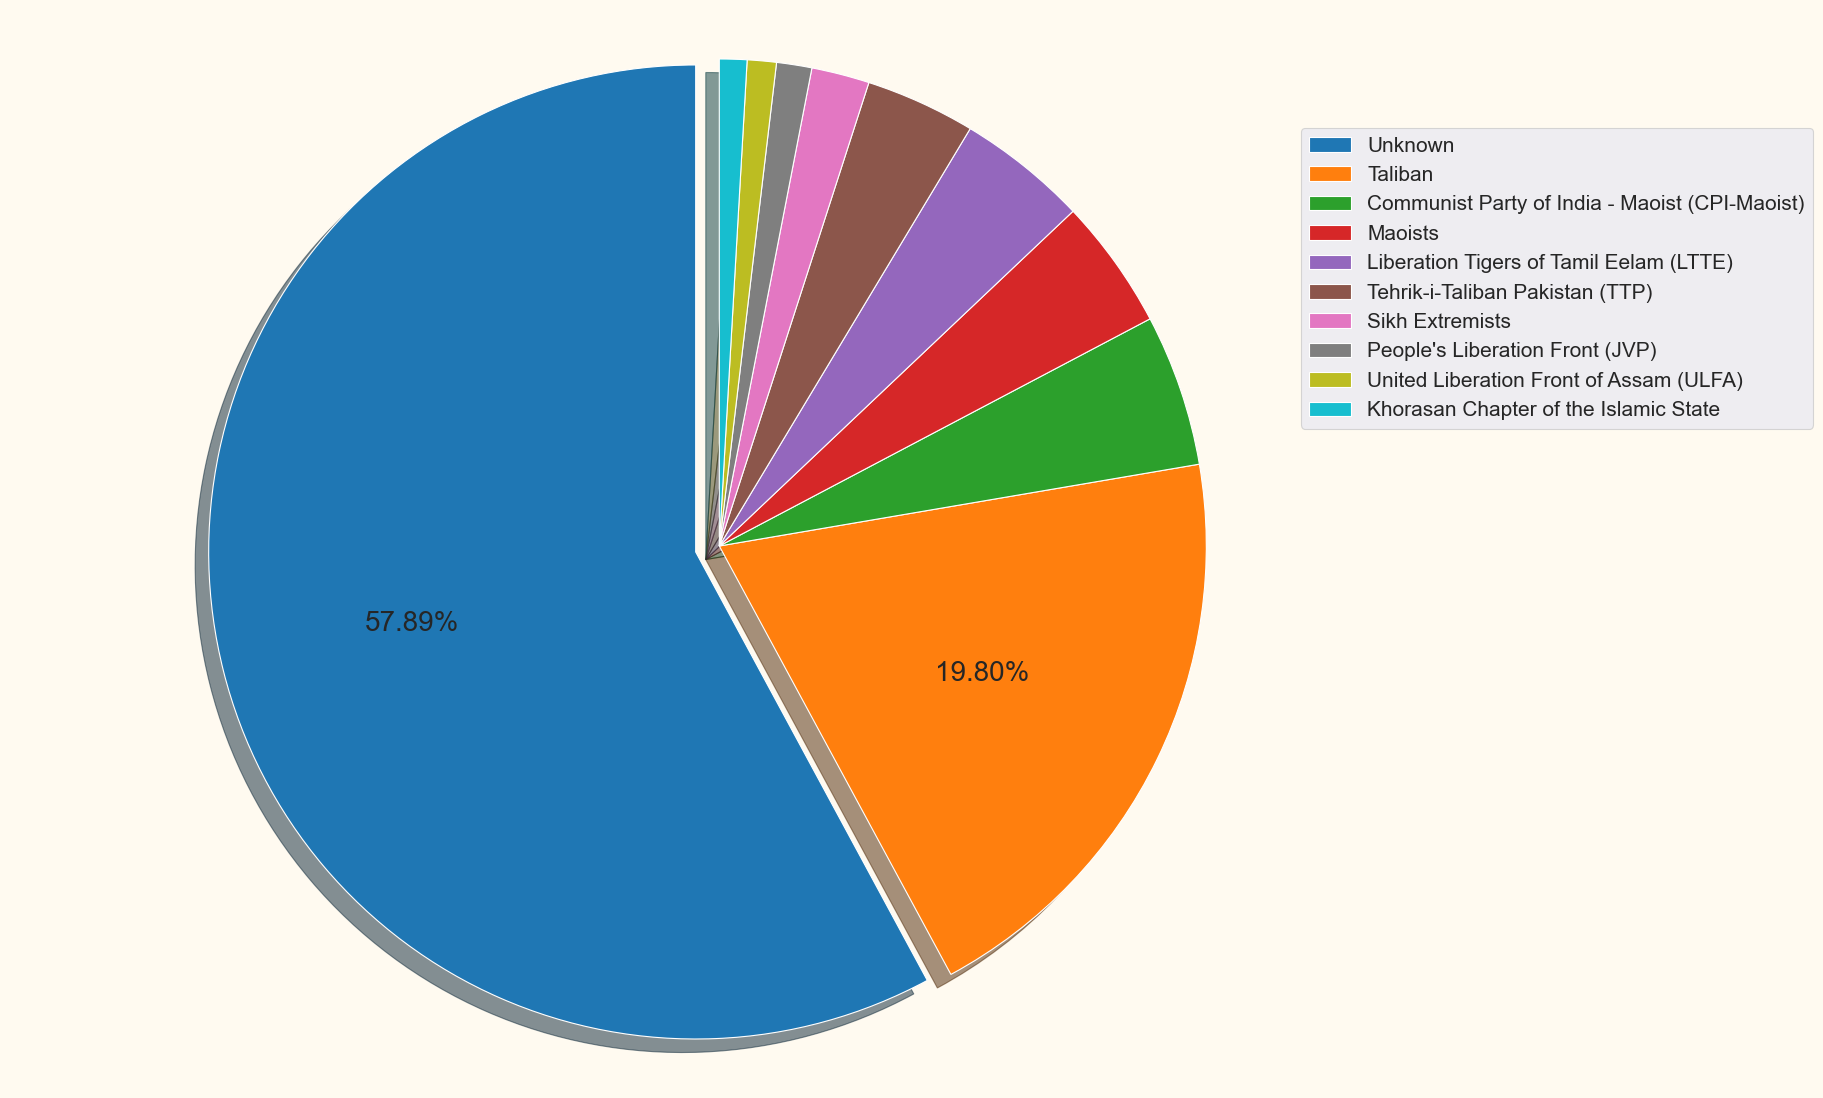

In [309]:
def my_autopct(pct): 
  return ("%.2f%%" % pct) if pct>10 else ""

fig, ax = plt.subplots(figsize=(18, 14), subplot_kw=dict(aspect="equal"))
myexplode=[0.05, 0, 0, 0, 0, 0, 0, 0, 0, 0]
ax.pie(values, shadow=True, startangle=90, autopct=my_autopct, pctdistance=0.6, explode=myexplode, textprops={"fontsize": 20})
ax.axis('equal')
ax.legend(labels, loc='upper right', bbox_to_anchor = (1.3, 0.9), fontsize=15)
fig.set_facecolor("floralwhite")

**Observations and Analysis** 
- A vast majority of perpetrator group names haven't been reported, i.e., they have been marked as "unknown". It could be that such terrorist attacks were not properly documented, or that several non-state rebel groups and other discrete entities carried out the attack, in which case it becomes difficult to ascertain one particular cause of the attack. 

In [310]:
# Assess the record of no. of perpetrators involved in unknown attacks 
df_unknownperp = df_perp[df_perp["gname"]=="Unknown"]
df_unknownperp["nperps"].value_counts().head(5)

-99.0    18495
 2.0      1014
 1.0       877
 3.0       305
 4.0       299
Name: nperps, dtype: int64

In [24]:
df_perp.isnull().sum()

gname       0
nperpcap    0
nperps      0
dtype: int64

In [312]:
df_perp.isnull().sum()

gname       0
nperpcap    0
nperps      0
dtype: int64

In [311]:
df_perp.shape

(44152, 3)

In [313]:
df_perp.to_csv("data/perpetrator.csv", index=False) 

**Observations and Analysis**
- We do not have substantial evidence as to how many perpetrators were involved in the attack 

#### Target Data 

<!-- **Observations**
Media outlets often draw false inferences based on unsubstantiated evidence. Dubious reporting of terrorist attacks may hamper the efforts of security agencies in curtailing terrorism. Hence, for the time being, we will analyze only unsuspected instances of terrorist attacks. Suspected attacks can be (Infer)  -->

In [350]:
prelim_inspection(df_target)  

,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,corp2,target2,natlty2,natlty2_txt,targtype2,targtype2_txt,corp3,target3,natlty3,natlty3_txt,targtype3,targtype3_txt
0,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, cons...",Polish Ministry of Foreign Affairs,Deputy Foreign Minister: Zygfryd Wolniak,161.0,Poland,Polish Ministry of Foreign Affairs,Ambassador to Pakistan: Alojzy Bartoszek,161.0,Poland,7.0,Government (Diplomatic),Polish Ministry of Foreign Affairs,Consul General in Karachi: W. Duda,161.0,Poland,7.0,Government (Diplomatic)
1,6,Airports & Aircraft,42.0,Aircraft (not at an airport),Lufthansa,B-747,75.0,Germany,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6,Airports & Aircraft,43.0,Airline Officer/Personnel,Indian Airlines,"unk, asst. mgr., Indian Airlines, Kabul",92.0,India,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,11,Maritime,58.0,Commercial Maritime,NaN,Greek Freighter in Karachi,78.0,Greece,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,USIS Center,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset Overview



(44152, 20)

Dataset Shape



targtype1             int64
targtype1_txt        object
targsubtype1        float64
targsubtype1_txt     object
corp1                object
target1              object
natlty1             float64
natlty1_txt          object
corp2                object
target2              object
natlty2             float64
natlty2_txt          object
targtype2           float64
targtype2_txt        object
corp3                object
target3              object
natlty3             float64
natlty3_txt          object
targtype3           float64
targtype3_txt        object
dtype: object

Column datatypes



targtype1           False
targtype1_txt       False
targsubtype1         True
targsubtype1_txt     True
corp1                True
target1              True
natlty1              True
natlty1_txt          True
corp2                True
target2              True
natlty2              True
natlty2_txt          True
targtype2            True
targtype2_txt        True
corp3                True
target3              True
natlty3              True
natlty3_txt          True
targtype3            True
targtype3_txt        True
dtype: bool

Check for null values



targtype1              21
targtype1_txt          21
targsubtype1          109
targsubtype1_txt      109
corp1                7737
target1             21916
natlty1                73
natlty1_txt            73
corp2                 694
target2              1602
natlty2                31
natlty2_txt            31
targtype2              21
targtype2_txt          21
corp3                 105
target3               204
natlty3                19
natlty3_txt            19
targtype3              18
targtype3_txt          18
dtype: int64

Count of unique values



,targtype1,targsubtype1,natlty1,natlty2,targtype2,natlty3,targtype3
count,44152.000000,41135.000000,43335.000000,3215.000000,3302.000000,293.000000,294.000000
mean,8.818038,48.129841,103.883143,80.902955,10.262871,98.071672,9.527211
std,6.797764,30.840459,87.226026,100.909630,5.579961,152.016801,5.745835
min,1.000000,1.000000,4.000000,4.000000,1.000000,4.000000,1.000000
25%,3.000000,23.000000,19.000000,4.000000,4.000000,4.000000,3.000000
50%,4.000000,36.000000,92.000000,92.000000,14.000000,92.000000,14.000000
75%,14.000000,74.000000,153.000000,153.000000,14.000000,153.000000,14.000000
85%,17.000000,84.000000,153.000000,153.000000,14.000000,153.000000,14.000000
95%,20.000000,106.000000,186.000000,186.000000,15.000000,186.000000,15.350000
99%,22.000000,110.000000,422.000000,422.000000,21.000000,999.000000,19.000000


Dataset descriptive information 



corp3               99.406595
natlty3_txt         99.336383
natlty3             99.336383
targtype3_txt       99.334118
targtype3           99.334118
target3             99.320529
corp2               93.332125
natlty2_txt         92.718337
natlty2             92.718337
target2             92.571118
targtype2           92.521290
targtype2_txt       92.521290
corp1               13.951803
targsubtype1_txt     6.833213
targsubtype1         6.833213
natlty1_txt          1.850426
natlty1              1.850426
target1              0.235550
targtype1_txt        0.000000
targtype1            0.000000
dtype: float64

Percentage of null values



In [340]:
df_target["corp2"].value_counts()

Not Applicable                      1109
Unknown                              271
Civilians                            218
Afghan Police                        103
Afghan National Army (ANA)            58
                                    ... 
Elder Vehicles                         1
Police officers in Giro district       1
Indian Oil                             1
Sri Lankan Red Cross worker            1
Afghan Voice Agency                    1
Name: corp2, Length: 694, dtype: int64

In [351]:
# Are there any corporations which have been targeted in other columns but no information in main column. Bring all of them under the same umbrella
df_target["corp1"] = np.where(df_target["corp1"].isnull(), df_target["corp2"], df_target["corp1"])
df_target["corp1"] = np.where(df_target["corp1"].isnull(), df_target["corp3"], df_target["corp1"])
df_target["corp1"] = np.where(df_target["corp1"].isnull(), "Unknown", df_target["corp1"])
df_target["corp2"] = np.where(df_target["corp2"].isnull(), df_target["corp3"], df_target["corp3"])
df_target["corp2"] = np.where(df_target["corp2"].isnull(), "Unknown", df_target["corp2"])
df_target["corp3"] = np.where(df_target["corp3"].isnull(), "Unknown", df_target["corp3"])
df_target["corp1"] = df_target.apply(lambda row: append_values(row), axis=1)

In [352]:
df_target.drop(["corp2", "corp3"], axis=1, inplace=True)

In [353]:
df_target.drop(["targtype1", "targsubtype1", "target1", "natlty1", "target2", "natlty2", "natlty2_txt", "targtype2_txt", 
                "target3", "natlty3", "natlty3_txt", "targtype3_txt"], axis=1, inplace=True)

In [354]:
df_target.drop(["targtype2"], axis=1, inplace=True)
df_target.drop(["targtype3"], axis=1, inplace=True)

In [355]:
df_target["corp1"].value_counts()

Unknown                            11377
Not Applicable                      3573
Afghan Police                       2118
Pakistani Police                    1099
Afghan National Army (ANA)           828
                                   ...  
Education system of Afghanistan        1
Sri Lanka bureaucracy                  1
Sri Lankan utilities                   1
The legal system of Afghanistan        1
Forest Department Manipur              1
Name: corp1, Length: 7760, dtype: int64

**Questions** 
- Any particular type of targets that were attacked the most? 
- Variation of attacked targets according to region(nationality)

In [356]:
df_target["corp1"].value_counts()

Unknown                            11377
Not Applicable                      3573
Afghan Police                       2118
Pakistani Police                    1099
Afghan National Army (ANA)           828
                                   ...  
Education system of Afghanistan        1
Sri Lanka bureaucracy                  1
Sri Lankan utilities                   1
The legal system of Afghanistan        1
Forest Department Manipur              1
Name: corp1, Length: 7760, dtype: int64

In [361]:
df_target.isnull().sum()

targettype        0
targsubtype    3017
corp1             0
nationality       0
dtype: int64

In [363]:
# Drop "targsubtype1_txt"
df_target = df_target.rename(columns={"targtype1_txt": "targettype", "targsubtype1_txt": "targsubtype", "natlty1_txt": "nationality"})
df_target["nationality"] = df_target["nationality"].fillna("Unknown")

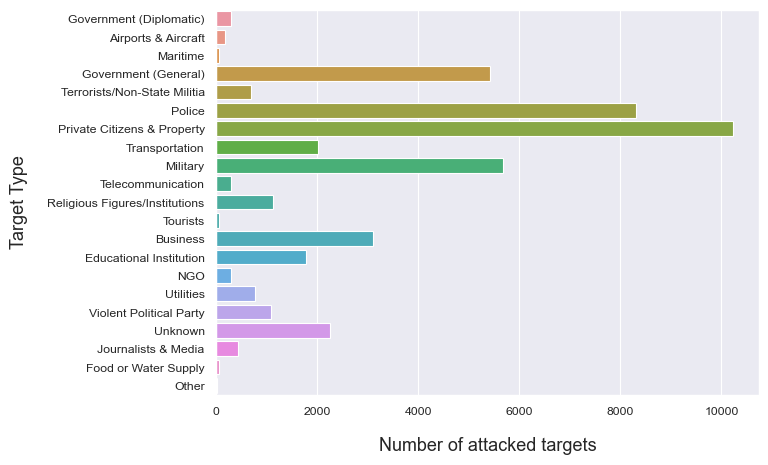

In [366]:
plt.figure(figsize=(7, 5))
sns.set_context("paper")
sns.set_style("darkgrid")
ax = sns.countplot(data=df_target, y="targettype")
ax.set_xlabel("Number of attacked targets", fontsize=13, labelpad=15)
ax.set_ylabel("Target Type", fontsize=13, labelpad=14)
plt.show()

**Observations and Analysis**
- Civilians were the major targets in most of the attacks, followed by police and the military

In [320]:
df_target.isnull().sum()

targettype        0
targsubtype    3017
corp1             0
natlty1_txt       0
dtype: int64

In [365]:
# Save the data 
df_target.to_csv("data/target.csv", index=False)

## Incident Information 

In [226]:
df_incident = df[["summary", "crit1", "crit2", "crit3", "doubtterr", 
                  "alternative", "alternative_txt", "multiple", "related"]]
prelim_inspection(df_incident)

,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,related
0,NaN,1,1,1,0,NaN,NaN,0,NaN
1,NaN,1,1,1,0,NaN,NaN,0,NaN
2,NaN,1,1,1,0,NaN,NaN,0,NaN
3,NaN,1,1,1,0,NaN,NaN,0,NaN
4,NaN,1,1,1,0,NaN,NaN,0,NaN


Dataset Overview



(44152, 9)

Dataset Shape



summary             object
crit1                int64
crit2                int64
crit3                int64
doubtterr            int64
alternative        float64
alternative_txt     object
multiple             int64
related             object
dtype: object

Column datatypes



summary             True
crit1              False
crit2              False
crit3              False
doubtterr          False
alternative         True
alternative_txt     True
multiple           False
related             True
dtype: bool

Check for null values



summary            37000
crit1                  2
crit2                  2
crit3                  2
doubtterr              3
alternative            5
alternative_txt        5
multiple               2
related             2969
dtype: int64

Count of unique values



,crit1,crit2,crit3,doubtterr,alternative,multiple
count,44152.000000,44152.000000,44152.000000,44152.000000,5774.000000,44152.000000
mean,0.987883,0.992141,0.905531,-0.245991,1.355906,0.109553
std,0.109411,0.088304,0.292484,1.860259,0.761495,0.312336
min,0.000000,0.000000,0.000000,-9.000000,1.000000,0.000000
25%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
50%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000
85%,1.000000,1.000000,1.000000,0.000000,2.000000,0.000000
95%,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000
99%,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


Dataset descriptive information 



related            89.037869
alternative        86.922450
alternative_txt    86.922450
summary            15.557619
crit1               0.000000
crit2               0.000000
crit3               0.000000
doubtterr           0.000000
multiple            0.000000
dtype: float64

Percentage of null values



In [227]:
df_incident.drop(["summary"], axis=1, inplace=True)

In [228]:
print(df_incident["related"].isnull().sum())
print(df_incident["multiple"].value_counts())

39312
0    39315
1     4837
Name: multiple, dtype: int64


In [229]:
df_incident["related"] = df_incident["related"].fillna("Unknown")
df_incident["alternative"] = df_incident["alternative"].fillna("Unknown")
df_incident["alternative_txt"] = df_incident["alternative_txt"].fillna("Unknown")

In [230]:
df_incident["doubtterr"] = df_incident["doubtterr"].astype("int64")
df_incident["multiple"] = df_incident["multiple"].astype("int64")

**Questions**
- Attacks where the inclusion criteria for terrorism is ascertained and where it is not ascertained. Damage caused in such attacks? 
- Events which were a part of multiple co-ordinated attack. Were such events terrorist attacks OR non-terrorist attacks? Its necessary to study their impact, and also analyze the underlying pattern of such attacks

In [231]:
df_terr = df_incident[df_incident["doubtterr"]==0]
df_notterr = df_incident[df_incident["doubtterr"]==1]
pd.crosstab(index=df_incident["crit1"], columns=[df_incident["crit2"], df_incident["crit3"]], rownames=["crit1"], colnames=["crit2", "crit3"])

crit2    0     1       
crit3    1     0      1
crit1                  
0        0     0    535
1      347  4171  39099

In [232]:
df_notterr.isnull().sum()

crit1              0
crit2              0
crit3              0
doubtterr          0
alternative        0
alternative_txt    0
multiple           0
related            0
dtype: int64

In [233]:
df_incident = df_incident.rename(columns={"alternative_txt": "alternative_attack_type"})

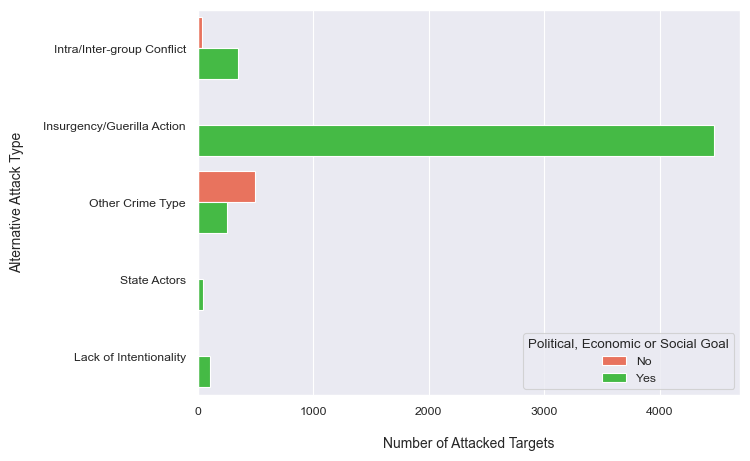

In [239]:
plt.figure(figsize=(7, 5))
ax = sns.countplot(data=df_notterr, y="alternative_txt", hue="crit1", palette=["tomato", "limegreen"])
ax.set_xlabel("Number of Attacked Targets", fontsize=10, labelpad=15)
ax.set_ylabel("Alternative Attack Type", fontsize=10, labelpad=14)
ax.legend(title="Political, Economic or Social Goal", loc="lower right", labels=["No", "Yes"])
plt.show(ax)

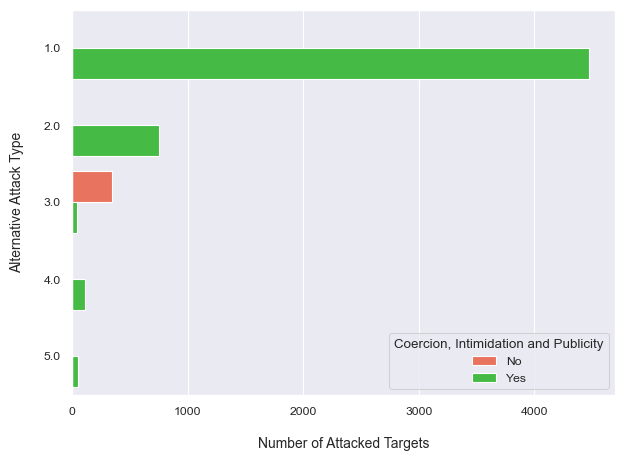

In [237]:
plt.figure(figsize=(7, 5))
ax1 = sns.countplot(data=df_notterr, y="alternative", hue="crit2", palette=["tomato", "limegreen"])
ax1.set_xlabel("Number of Attacked Targets", fontsize=10, labelpad=15)
ax1.set_ylabel("Alternative Attack Type", fontsize=10, labelpad=14)
ax1.legend(title="Coercion, Intimidation and Publicity", loc="lower right", labels=["No", "Yes"])

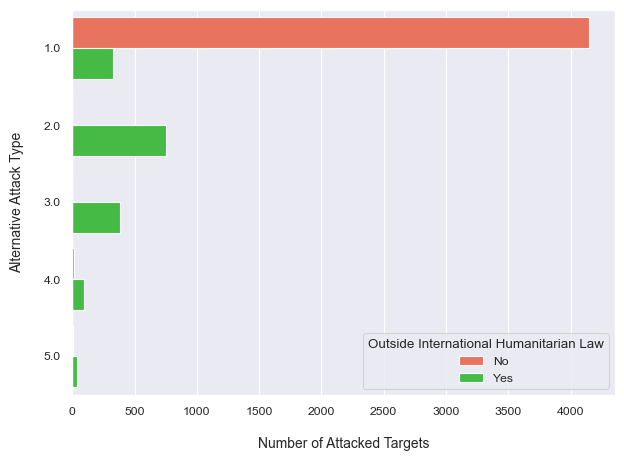

In [238]:
plt.figure(figsize=(7, 5))
ax1 = sns.countplot(data=df_notterr, y="alternative", hue="crit3", palette=["tomato", "limegreen"])
ax1.set_xlabel("Number of Attacked Targets", fontsize=10, labelpad=15)
ax1.set_ylabel("Alternative Attack Type", fontsize=10, labelpad=14)
ax1.legend(title="Outside International Humanitarian Law", loc="lower right", labels=["No", "Yes"])

**Observations and Analysis**
- Confirmed instances of terrorist attacks were majorly intended to coerce, intimidate or publicize with a specific political, economic, religious OR social goal, and they were also conducted in an illegitimate manner, i.e., outside the precints of humanitarian law

In [217]:
df_multiple = df_incident[df_incident["multiple"]==1]

In [218]:
print(df_incident["doubtterr"].value_counts()) 

 0    36533
 1     5771
-9     1848
Name: doubtterr, dtype: int64


In [219]:
print(df_incident["crit1"].value_counts())
print()
print(df_incident["crit2"].value_counts())
print()
print(df_incident["crit3"].value_counts())
print()

1    43617
0      535
Name: crit1, dtype: int64

1    43805
0      347
Name: crit2, dtype: int64

1    39981
0     4171
Name: crit3, dtype: int64



In [220]:
df_incident["doubtterr"].value_counts()

 0    36533
 1     5771
-9     1848
Name: doubtterr, dtype: int64

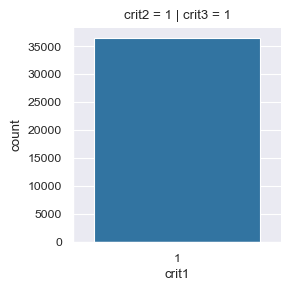

In [221]:
g = sns.FacetGrid(df_terr, col="crit3", row="crit2")
g.map(sns.countplot, "crit1")

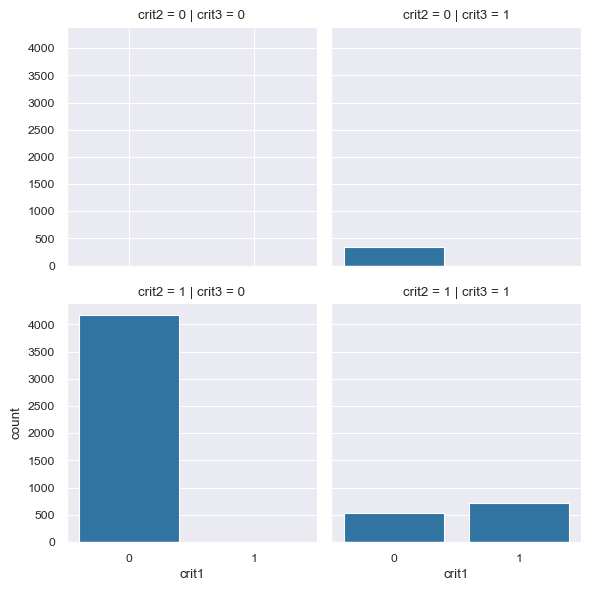

In [222]:
g = sns.FacetGrid(df_notterr, col="crit3", row="crit2")
g.map(sns.countplot, "crit1")

**Observations and Analysis**
- Other types of attacks were instances of legitimate warfare. It is possible that they may be a result of armed conflict between the two countries. 

In [223]:
df_incident.isnull().sum()

summary            6869
crit1                 0
crit2                 0
crit3                 0
doubtterr             0
alternative           0
alternative_txt       0
multiple              0
related               0
dtype: int64

In [225]:
df_incident.to_csv("data/incident.csv", index=False)

## Incident Location Analysis

In [70]:
df_loc = df[["country_txt", "provstate", "city", "vicinity", "location", "latitude", "longitude"]]
df_loc.rename(columns={"country_txt": "country", "provstate": "province"}, inplace=True)
prelim_inspection(df_loc)

,country,province,city,vicinity,location,latitude,longitude
0,Pakistan,Sindh,Karachi,0,NaN,24.891115,67.143311
1,India,Delhi,New Delhi,0,NaN,28.585836,77.153336
2,Afghanistan,Kabul,Kabul,0,NaN,34.516895,69.147011
3,Pakistan,Sindh,Karachi,0,NaN,24.891115,67.143311
4,Pakistan,North-West Frontier Province,Peshawar,0,NaN,34.006004,71.537430


Dataset Overview



(44152, 7)

Dataset Shape



country       object
province      object
city          object
vicinity       int64
location      object
latitude     float64
longitude    float64
dtype: object

Column datatypes



country      False
province     False
city          True
vicinity     False
location      True
latitude      True
longitude     True
dtype: bool

Check for null values



country          9
province       117
city         11412
vicinity         3
location     15798
latitude     15968
longitude    15683
dtype: int64

Count of unique values



,vicinity,latitude,longitude
count,44152.000000,43673.000000,43673.000000
mean,0.075738,28.456280,74.271976
std,0.272177,7.343117,8.600140
min,-9.000000,-20.420074,57.464140
25%,0.000000,24.891115,67.687177
50%,0.000000,31.467463,71.383188
75%,0.000000,34.002579,80.623416
85%,0.000000,34.386435,85.125982
95%,1.000000,35.671067,91.815692
99%,1.000000,36.868631,94.074439


Dataset descriptive information 



location     56.984961
latitude      1.084889
longitude     1.084889
city          0.339735
country       0.000000
province      0.000000
vicinity      0.000000
dtype: float64

Percentage of null values



**Observations and Analysis**
- Within South Asia, Pakistan witnessed the largest number of terrorist attacks during the period from 1970-2017 

In [71]:
province_city_info = pd.DataFrame(df_loc.groupby("country")["city"].nunique().sort_values(ascending=False))
province_city_info = province_city_info.reset_index()
province_city_info.columns=["country", "city_count"]
vicinity_count = df_loc.groupby("country")["vicinity"].sum().to_dict()
province_city_info["vicinity"] = province_city_info["country"].map(lambda country: vicinity_count[country])
province_city_info["vicinity_ratio"] =  np.round(((province_city_info["vicinity"]) / (province_city_info["city_count"])), 2)
province_city_info.style.highlight_max(color="green", subset=["city_count", "vicinity", "vicinity_ratio"])

,country,city_count,vicinity,vicinity_ratio
0,India,4798,1297,0.270000
1,Afghanistan,2764,619,0.220000
2,Pakistan,2283,1026,0.450000
3,Sri Lanka,691,242,0.350000
4,Nepal,598,69,0.120000
5,Bangladesh,426,91,0.210000
6,Maldives,7,0,0.000000
7,Bhutan,4,0,0.000000
8,Mauritius,2,0,0.000000


**Observations and Analysis**
- India, being a large country, has considerably larger number of cities which have witnessed terrorist attacks. However, percentage of urban terrorist attacks is much higher in Pakistan than in any other country in South Asia 

Text(0.5, 0, 'Count of Attacks')

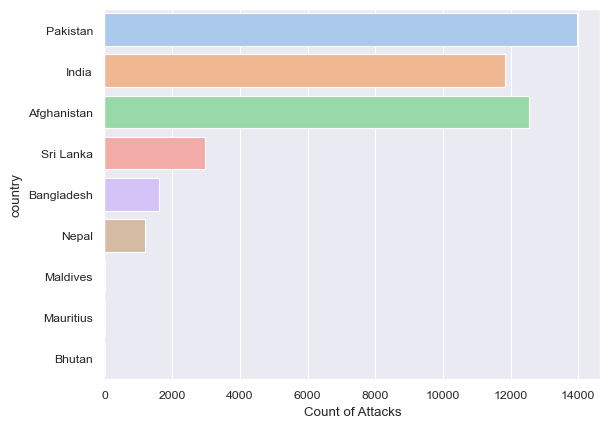

In [74]:
ax = sns.countplot(y="country", data=df_loc, palette="pastel")
ax.set_xlabel("Count of Attacks")

In [75]:
df_loc.drop(["location"], axis=1, inplace=True)
print(df_loc["latitude"].isnull().sum())
print(df_loc["city"].isnull().sum())

479
150


**To-Do** 
- Drop rows with null values of "latitude" AND "longitude" 

In [76]:
# For cities where location is not provided, add details of the capital city of those respective countries AND enter the corresponding latitude AND longitude. Mark the undetected fields
df_loc["city"].fillna("Unknown", inplace=True)
df_loc["vicinity"].value_counts()

 0    40788
 1     3362
-9        2
Name: vicinity, dtype: int64

{"Patika": [, (33.17568, 68.73045)], 
 "Qalat": [32.100204, 66.901016]

- Build a map 
- Plot points AND associated meta-data on the map - also mention country name 

In [77]:
df_loc.isnull().sum()

country        0
province       0
city           0
vicinity       0
latitude     479
longitude    479
dtype: int64

In [78]:
df_loc.shape

(44152, 6)

**Combine with other relevant data for a more drilldown analysis**

In [79]:
# Save to CSV 
df_loc.to_csv("data/location.csv", index=False)

## GTD Id and Date

In [80]:
df_event = df[["eventid", "iyear", "imonth", "iday", "approxdate", "extended", "resolution"]]

In [81]:
prelim_inspection(df_event)

,eventid,iyear,imonth,iday,approxdate,extended,resolution
0,197000000000,1970,11,1,NaN,0,NaN
1,197000000000,1972,2,22,NaN,0,NaN
2,197000000000,1973,5,1,NaN,0,NaN
3,197000000000,1974,2,2,NaN,1,02-03-1974
4,197000000000,1974,12,9,NaN,0,NaN


Dataset Overview



(44152, 7)

Dataset Shape



eventid        int64
iyear          int64
imonth         int64
iday           int64
approxdate    object
extended       int64
resolution    object
dtype: object

Column datatypes



eventid       False
iyear         False
imonth        False
iday          False
approxdate     True
extended      False
resolution     True
dtype: bool

Check for null values



eventid          6
iyear           46
imonth          13
iday            32
approxdate    1016
extended         2
resolution     425
dtype: int64

Count of unique values



,eventid,iyear,imonth,iday,extended
count,4.415200e+04,44152.000000,44152.000000,44152.000000,44152.000000
mean,2.009320e+11,2008.755005,6.444283,15.583326,0.056373
std,9.177522e+08,8.670915,3.389015,8.828559,0.230644
min,1.970000e+11,1970.000000,0.000000,0.000000,0.000000
25%,2.010000e+11,2007.000000,4.000000,8.000000,0.000000
50%,2.010000e+11,2012.000000,6.000000,15.000000,0.000000
75%,2.020000e+11,2015.000000,9.000000,23.000000,0.000000
85%,2.020000e+11,2016.000000,11.000000,26.000000,0.000000
95%,2.020000e+11,2017.000000,12.000000,29.000000,1.000000
99%,2.020000e+11,2017.000000,12.000000,31.000000,1.000000


Dataset descriptive information 



resolution    98.915111
approxdate    96.192698
eventid        0.000000
iyear          0.000000
imonth         0.000000
iday           0.000000
extended       0.000000
dtype: float64

Percentage of null values



Text(0, 0.5, 'Frequency of Terorist Attacks')

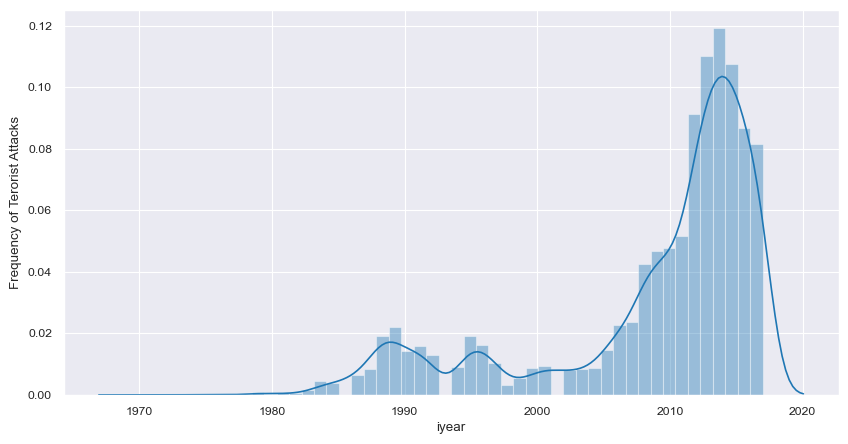

In [82]:
sns.set_style('darkgrid')
plt.figure(figsize=(10, 5))
sns.distplot(df_event["iyear"], kde=True)
plt.ylabel("Frequency of Terorist Attacks")

**Observations and Analysis**
- The 2-decade period from 1970-1990 was a period of decline in the incidence of terrorist attacks around the world. From 1990-2000, the instances of terrorism declined a bit. However, the first decade of the 21st century witnessed the highest rise in the instances of terrorism. 

In [83]:
# Save the dataframe 
df_event.to_csv("data/event.csv", index=False)

In [84]:
df_event.shape

(44152, 7)

## Incident Attack Information 


In [323]:
df_attack = df[["attacktype1_txt", "attacktype2_txt", "attacktype3_txt", "success", "suicide"]]
df_weapon = df[["weaptype1_txt", "weapsubtype1_txt", "weaptype2_txt", "weapsubtype2_txt", 
                "weaptype3_txt", "weapsubtype3_txt", "weapdetail"]]

#### Analyze attack data

In [324]:
prelim_inspection(df_attack)

,attacktype1_txt,attacktype2_txt,attacktype3_txt,success,suicide
0,Assassination,NaN,NaN,1,0
1,Hijacking,NaN,NaN,1,0
2,Unknown,NaN,NaN,0,0
3,Bombing/Explosion,NaN,NaN,1,0
4,Bombing/Explosion,NaN,NaN,1,0


Dataset Overview



(44152, 5)

Dataset Shape



attacktype1_txt    object
attacktype2_txt    object
attacktype3_txt    object
success             int64
suicide             int64
dtype: object

Column datatypes



attacktype1_txt    False
attacktype2_txt     True
attacktype3_txt     True
success            False
suicide            False
dtype: bool

Check for null values



attacktype1_txt    9
attacktype2_txt    9
attacktype3_txt    6
success            2
suicide            2
dtype: int64

Count of unique values



,success,suicide
count,44152.000000,44152.000000
mean,0.874887,0.043599
std,0.330851,0.204204
min,0.000000,0.000000
25%,1.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
85%,1.000000,0.000000
95%,1.000000,0.000000
99%,1.000000,1.000000


Dataset descriptive information 



attacktype3_txt    99.748596
attacktype2_txt    95.341094
attacktype1_txt     0.000000
success             0.000000
suicide             0.000000
dtype: float64

Percentage of null values



In [330]:
# Dropping columns with a high percentage of null values 
df_attack.drop(["attacktype2_txt", "attacktype3_txt"], axis=1, inplace=True)
df_attack = df_attack.rename(columns={"attacktype1_txt": "attacktype"})

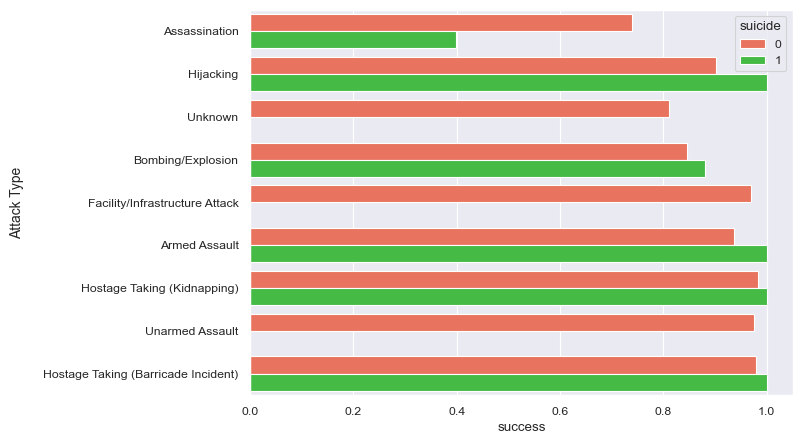

In [368]:
plt.figure(figsize=(7, 5))
sns.set_context("paper")    
sns.set_style("darkgrid")   
ax3=sns.barplot(y="attacktype", x="success", data=df_attack, hue="suicide", palette=["tomato", "limegreen"], ci=None)
ax3.set_ylabel("Attack Type", fontsize=10, labelpad=14)
sns.move_legend(ax3, loc="best")

#### Analyze weapon data

In [332]:
prelim_inspection(df_weapon)

,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weapdetail
0,Vehicle (not to include vehicle-borne explosiv...,NaN,NaN,NaN,NaN,NaN,Run down by car
1,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,Explosives
2,Unknown,NaN,NaN,NaN,NaN,NaN,NaN
3,Firearms,Automatic or Semi-Automatic Rifle,Explosives,Unknown Explosive Type,NaN,NaN,Automatic firearms; Explosive
4,Explosives,Unknown Explosive Type,NaN,NaN,NaN,NaN,Explosive


Dataset Overview



(44152, 7)

Dataset Shape



weaptype1_txt       object
weapsubtype1_txt    object
weaptype2_txt       object
weapsubtype2_txt    object
weaptype3_txt       object
weapsubtype3_txt    object
weapdetail          object
dtype: object

Column datatypes



weaptype1_txt       False
weapsubtype1_txt     True
weaptype2_txt        True
weapsubtype2_txt     True
weaptype3_txt        True
weapsubtype3_txt     True
weapdetail           True
dtype: bool

Check for null values



weaptype1_txt         12
weapsubtype1_txt      30
weaptype2_txt          9
weapsubtype2_txt      27
weaptype3_txt          8
weapsubtype3_txt      20
weapdetail          6657
dtype: int64

Count of unique values



,weaptype1_txt,weapsubtype1_txt,weaptype2_txt,weapsubtype2_txt,weaptype3_txt,weapsubtype3_txt,weapdetail
count,44152,39927,3142,2902,428,404,24522
unique,12,30,9,27,8,20,6657
top,Explosives,Unknown Gun Type,Firearms,Unknown Gun Type,Firearms,Unknown Gun Type,Unknown firearms were used in the attack.
freq,22437,11283,1320,847,235,105,1884


Dataset descriptive information 



weapsubtype3_txt    99.084979
weaptype3_txt       99.030621
weapsubtype2_txt    93.427251
weaptype2_txt       92.883675
weapdetail          44.460047
weapsubtype1_txt     9.569215
weaptype1_txt        0.000000
dtype: float64

Percentage of null values



In [333]:
# Dropping columns with a high percentage of null values 
df_weapon.drop(["weapsubtype3_txt", "weaptype3_txt", "weapsubtype2_txt", "weaptype2_txt", "weapdetail"], axis=1, inplace=True)
df_weapon["weapsubtype1_txt"] = np.where(df_weapon["weapsubtype1_txt"].isnull(), "Unknown", df_weapon["weapsubtype1_txt"].isnull())

In [334]:
df_weapon.columns

Index(['weaptype1_txt', 'weapsubtype1_txt'], dtype='object')

In [335]:
df_weapon = df_weapon.rename(columns={"weaptype1_txt": "weaptype", "weapsubtype1_txt": "weapsubtype"})
df_weapon = df_weapon.apply(lambda x: x.str.strip())
df_weapon["weaptype"] = np.where(df_weapon["weaptype"]=="Vehicle (not to include vehicle-borne explosives, i.e., car or truck bombs)", "Vehicles", df_weapon["weaptype"])

In [336]:
df_weapon = df_weapon.rename(columns={"weaptype1_txt": "weapontype", "weapsubtype1_txt": "weapsubtype"})

Text(0, 0.5, 'Attack weapon')

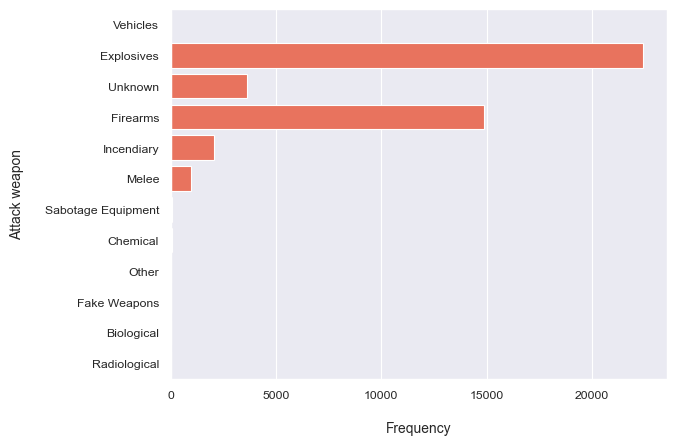

In [246]:
ax2 = sns.countplot(y="weaptype", data=df_weapon, palette=["tomato"])
ax2.set_xlabel("Frequency", fontsize=10, labelpad=15)
ax2.set_ylabel("Attack weapon", fontsize=10, labelpad=15)

**Observations**
A large majority of the attacks have occured due to bombing/explosion OR armed assaults, some of which were unsucessful OR thwarted by the security forces 

In [247]:
df_weapon["weaptype"].unique()

array(['Vehicles', 'Explosives', 'Unknown', 'Firearms', 'Incendiary',
       'Melee', 'Sabotage Equipment', 'Chemical', 'Other', 'Fake Weapons',
       'Biological', 'Radiological'], dtype=object)

In [337]:
df_weapon_category = pd.DataFrame(df_weapon.groupby("weaptype")["weapsubtype"].value_counts())
df_weapon_category.rename(columns={"weapsubtype": "weapon_count"}, inplace=True)
df_weapon_category = df_weapon_category.reset_index(level=["weapsubtype"])
df_weapon_category = df_weapon_category.reset_index(level=["weaptype"])

In [249]:
df_weapon_category.groupby(["weaptype"])["weapon_count"].max()

weaptype
Biological                2
Chemical                 52
Explosives            22432
Fake Weapons              3
Firearms              14895
Incendiary             1584
Melee                   963
Other                    16
Radiological              1
Sabotage Equipment       44
Unknown                3645
Vehicles                 15
Name: weapon_count, dtype: int64

In [322]:
df_attack.columns

Index(['attacktype1_txt', 'success', 'suicide'], dtype='object')

In [338]:
# Save the final data for analysis
df_attack.to_csv("data/attack.csv", index=False)
df_weapon.to_csv("data/weapon.csv", index=False)

## Casualties and Consequences 

In [251]:
def freq_impute(df): 
    for col in df.columns: 
        df[col] = np.where(df[col].isnull(), df[col].value_counts().sort_values(ascending=False).index[0], df[col])
    return df

In [252]:
df_casualties = df[["nkill", "nkillus", "nkillter", "nwound", "nwoundus", "nwoundte", 
                    "property", "propextent", "propextent_txt", "propvalue", "propcomment", 
                    "ishostkid", "nhostkid", "nhostkidus", "nhours", "ndays", "divert", 
                    "kidhijcountry", "hostkidoutcome", "hostkidoutcome_txt", 
                    "nreleased"]]

In [114]:
prelim_inspection(df_casualties)

,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,...,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,hostkidoutcome,hostkidoutcome_txt,nreleased
0,4.0,0.0,0.0,20.0,0.0,0.0,0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,0.0,0.0,0.0,0.0,0.0,0,NaN,NaN,NaN,...,1.0,187.0,0.0,NaN,NaN,Yemen,Yemen,2.0,Hostage(s) released by perpetrators,187.0
2,0.0,NaN,NaN,1.0,NaN,NaN,0,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,...,1.0,2.0,0.0,0.0,1.0,NaN,NaN,2.0,Hostage(s) released by perpetrators,NaN
4,0.0,0.0,NaN,2.0,2.0,NaN,1,3.0,Minor (likely < $1 million),130000.0,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Dataset Overview



(44152, 21)

Dataset Shape



nkill                 float64
nkillus               float64
nkillter              float64
nwound                float64
nwoundus              float64
nwoundte              float64
property                int64
propextent            float64
propextent_txt         object
propvalue             float64
propcomment            object
ishostkid             float64
nhostkid              float64
nhostkidus            float64
nhours                float64
ndays                 float64
divert                 object
kidhijcountry          object
hostkidoutcome        float64
hostkidoutcome_txt     object
nreleased             float64
dtype: object

Column datatypes



nkill                  True
nkillus                True
nkillter               True
nwound                 True
nwoundus               True
nwoundte               True
property              False
propextent             True
propextent_txt         True
propvalue              True
propcomment            True
ishostkid              True
nhostkid               True
nhostkidus             True
nhours                 True
ndays                  True
divert                 True
kidhijcountry          True
hostkidoutcome         True
hostkidoutcome_txt     True
nreleased              True
dtype: bool

Check for null values



nkill                  112
nkillus                 11
nkillter                58
nwound                 141
nwoundus                18
nwoundte                39
property                 3
propextent               3
propextent_txt           3
propvalue              107
propcomment           5967
ishostkid                3
nhostkid                86
nhostkidus               7
nhours                  23
ndays                  133
divert                  17
kidhijcountry           18
hostkidoutcome           7
hostkidoutcome_txt       7
nreleased               69
dtype: int64

Count of unique values



,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propvalue,ishostkid,nhostkid,nhostkidus,nhours,ndays,hostkidoutcome,nreleased
count,43245.000000,37300.00000,36925.000000,42355.000000,37226.000000,36340.000000,44152.000000,15766.000000,9.545000e+03,44151.000000,3646.000000,3623.000000,1092.000000,2525.000000,3479.000000,3345.000000
mean,2.329310,0.01437,0.573433,3.325156,0.015607,0.222675,-0.680422,3.266396,4.811420e+04,0.066431,5.573779,-0.234336,-73.821429,-38.239208,4.795056,-27.199402
std,7.153886,0.21476,4.317999,14.234301,0.715593,2.120403,3.159507,0.458568,3.610815e+06,0.472294,60.829708,4.933351,44.034152,114.635994,1.858638,56.007278
min,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,-9.000000,2.000000,-9.900000e+01,-9.000000,-99.000000,-99.000000,-99.000000,-99.000000,1.000000,-99.000000
25%,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-9.900000e+01,0.000000,1.000000,0.000000,-99.000000,-99.000000,4.000000,-99.000000
50%,1.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,-9.900000e+01,0.000000,2.000000,0.000000,-99.000000,-99.000000,4.000000,0.000000
75%,2.000000,0.00000,0.000000,2.000000,0.000000,0.000000,1.000000,4.000000,-9.900000e+01,0.000000,4.000000,0.000000,-99.000000,3.000000,7.000000,1.000000
85%,4.000000,0.00000,0.000000,5.000000,0.000000,0.000000,1.000000,4.000000,-9.900000e+01,0.000000,6.000000,0.000000,0.000000,7.000000,7.000000,3.000000
95%,10.000000,0.00000,3.000000,15.000000,0.000000,0.000000,1.000000,4.000000,-9.900000e+01,1.000000,18.000000,0.000000,4.000000,38.000000,7.000000,8.000000
99%,27.000000,0.00000,11.000000,50.000000,0.000000,6.000000,1.000000,4.000000,3.000000e+04,1.000000,110.000000,0.000000,18.000000,253.920000,7.000000,50.000000


Dataset descriptive information 



divert                99.895814
kidhijcountry         99.216344
nhours                97.526726
ndays                 94.281120
nreleased             92.423899
hostkidoutcome_txt    92.120402
hostkidoutcome        92.120402
nhostkidus            91.794256
nhostkid              91.742163
propvalue             78.381500
propextent            64.291538
propextent_txt        64.291538
propcomment           60.703932
nwoundte              17.693423
nkillter              16.368454
nwoundus              15.686719
nkillus               15.519116
nwound                 4.070031
nkill                  2.054267
ishostkid              0.002265
property               0.000000
dtype: float64

Percentage of null values



In [253]:
df_casualties.drop(["divert", "kidhijcountry", "nhours", "ndays", "nreleased", 
                    "hostkidoutcome_txt", "hostkidoutcome", "nhostkidus", "nhostkid", 
                    "propvalue", "propextent", "propextent_txt", "propcomment", "nkillus", 
                    "nwoundus"], axis=1, inplace=True)

In [153]:
prelim_inspection(df_casualties)

,nkill,nkillter,nwound,nwoundte,property,ishostkid
0,4.0,0.0,20.0,0.0,0,0.0
1,0.0,0.0,0.0,0.0,0,1.0
2,0.0,NaN,1.0,NaN,0,0.0
3,0.0,NaN,0.0,NaN,0,1.0
4,0.0,NaN,2.0,NaN,1,0.0


Dataset Overview



(44152, 6)

Dataset Shape



nkill        float64
nkillter     float64
nwound       float64
nwoundte     float64
property       int64
ishostkid    float64
dtype: object

Column datatypes



nkill         True
nkillter      True
nwound        True
nwoundte      True
property     False
ishostkid     True
dtype: bool

Check for null values



nkill        112
nkillter      58
nwound       141
nwoundte      39
property       3
ishostkid      3
dtype: int64

Count of unique values



,nkill,nkillter,nwound,nwoundte,property,ishostkid
count,43245.000000,36925.000000,42355.000000,36340.000000,44152.000000,44151.000000
mean,2.329310,0.573433,3.325156,0.222675,-0.680422,0.066431
std,7.153886,4.317999,14.234301,2.120403,3.159507,0.472294
min,0.000000,0.000000,0.000000,0.000000,-9.000000,-9.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2.000000,0.000000,2.000000,0.000000,1.000000,0.000000
85%,4.000000,0.000000,5.000000,0.000000,1.000000,0.000000
95%,10.000000,3.000000,15.000000,0.000000,1.000000,1.000000
99%,27.000000,11.000000,50.000000,6.000000,1.000000,1.000000


Dataset descriptive information 



nwoundte     17.693423
nkillter     16.368454
nwound        4.070031
nkill         2.054267
ishostkid     0.002265
property      0.000000
dtype: float64

Percentage of null values



In [255]:
df_casualties = freq_impute(df_casualties)

**For the sake of analysis, we have imputed null values with the most frequent category, as there is no known decipherable reason as to why they were not reported by the news sources.**

In [256]:
df_casualties[["nkill", "nkillter", "nwoundte", "nwound", "ishostkid"]] = df_casualties[["nkill", "nkillter", "nwoundte", \
                                                                          "nwound", "ishostkid"]].astype("int64")

In [257]:
df_casualties = df_casualties.reset_index()
df_casualties.drop("index", axis=1, inplace=True)

In [258]:
df_casualties.to_csv("data/casualties.csv", index=False)

In [259]:
print(df_attack.shape)
print(df_casualties.shape)
print(df_event.shape)
print(df_incident.shape)
print(df_loc.shape)
print(df_perp.shape)
print(df_target.shape)
print(df_weapon.shape)

(44152, 3)
(44152, 6)
(44152, 7)
(44152, 8)
(44152, 6)
(39236, 3)
(44152, 4)
(44152, 2)


**For the sake of analysis, we would also consider the total number of kills in a particular region**

## Entire Analysis  
- Drop rows with null values of "latitude" AND "longitude" 
- Since a vast majority of perpetrator group names are unknown, it is plausible that a majority of attacks were carried out by localized groups and insurgents, and they mostly operate within one nation state
-  A vast majority of the perpetrator group names are marked as "unknown". Analyze if their locations are clustered or such attacks have been carried out in  discrete locations
- Analyze attacked targets in specific regions 
- Visualize all co-ordinated attacks - by country 
- Number of kills in a particular region over time 
- Analysis of attacks which are a part of multiple co-ordinated attacks. Were such events terrorist attacks OR non-terrorist attacks? See the underlying pattern of such attacks 
- Unsuspected terrorist attacks were majorly intended to coerce, intimidate or publicize with a specific political, economic, religious OR social goal, and they were also conducted in an illegitimate manner. Assess the categories of such attacks
- Variation of attacked targets according to nationality

## Questions
- Ask something :)